### LSS on abalone dataset

#### import libraries

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv('abalone.data.csv')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#### Our data has no headers, so we add the header to the data frame.

In [81]:
data.columns =['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [82]:
# sex is not a physical measure, we ignore it. 
X = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
Y = data[['Rings']]

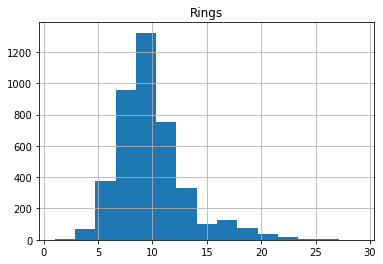

In [83]:
Y.hist(bins=15)
plt.show()

### Correlation

In [84]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [85]:
correlation_matrix = data.corr()
correlation_matrix["Rings"]

Length            0.557123
Diameter          0.575005
Height            0.558109
Whole weight      0.540818
Shucked weight    0.421256
Viscera weight    0.504274
Shell weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

In [86]:
X = X.to_numpy()
Y = Y.to_numpy()

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=20)

In [88]:
from LSS import LinearLeastSquare
lls = LinearLeastSquare()
w=lls.fit(X_train, Y_train)

In [89]:
MAE=lls.evaluate(X_test, Y_test, loss='MAE')
MSE=lls.evaluate(X_test, Y_test, loss='MSE')
Huber=lls.evaluate(X_test, Y_test, loss='Huber')
Hinge=lls.evaluate(X_test, Y_test, loss='Hinge')

In [90]:
print(f'MAE: {MAE}\nMSE: {MSE}\nHuber: {Huber}\nHinge: {Hinge}')

MAE: 1.731206552411515
MSE: 6.396048507171963
Huber: [[6.11267243]
 [4.74078099]
 [0.08129561]
 ...
 [0.83481322]
 [0.03384313]
 [3.14583071]]
Hinge: 0.0
